# A: Simple Linear Regression

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

In [12]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
#If you want to display dataset keys uncomment below.
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [13]:
data = pd.DataFrame(diabetes.data, columns=[diabetes.feature_names])
target = pd.DataFrame(diabetes.target)
print(data.describe())
x = diabetes.data[:, np.newaxis, 2]
y = np.array(target)

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
lr = LinearRegression().fit(x_train,  y_train)

In [7]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[975.27698313]]
lr.intercept_: [152.07653297]


In [8]:
# Make predictions using the testing test
y_pred = lr.predict(x_test)

In [9]:
print("Coefficient of Determination R Squared : %.2f" % r2_score(y_test, y_pred))

Coefficient of Determination R Squared : 0.32


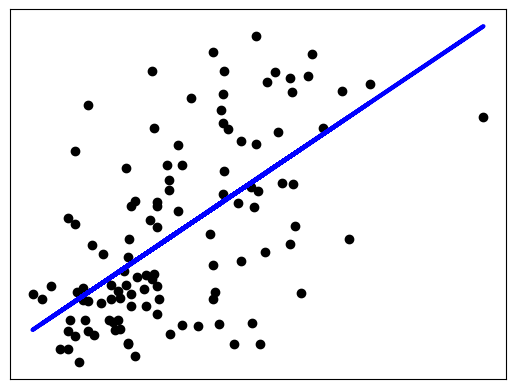

In [10]:
# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# B1: Multiple Linear Regression

In [7]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge

In [10]:
#boston dataset extended: added features using PolynomialFeatures
def load_extended_boston():
    boston = fetch_openml(data_id=531, parser='auto')
    x = boston.data
    x = MinMaxScaler().fit_transform(boston.data)
    x = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    return x, boston.target

In [12]:
x, y = load_extended_boston()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression().fit(x_train, y_train)
print('Training set score: {:.2f}'.format(lr.score(x_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(x_test, y_test)))

Training set score: 0.95
Test set score: 0.61


# B2: Multiple Linear Regression